In [ ]:
!wget "http://nlp.ist.i.kyoto-u.ac.jp/nl-resource/juman/juman-7.01.tar.bz2"
!bzip2 -dc juman-7.01.tar.bz2 | tar xvf -
%cd juman-7.01/
!./configure
!make
!make install
%cd ..
!ldconfig

In [ ]:
! wget http://nlp.ist.i.kyoto-u.ac.jp/nl-resource/knp/knp-4.19.tar.bz2
! tar jxvf knp-4.19.tar.bz2
% cd knp-4.19
!./configure
!make
!make install

In [ ]:
! pip install pyknp

In [ ]:
#from __future__ import unicode_literals # It is not necessary when you use python3.
#from pyknp import KNP
import  re

In [ ]:
import requests
import numpy as np
url = 'https://www.aozora.gr.jp/cards/000035/files/1567_14913.html' #青空文庫
res = requests.get(url)
try:
 res.raise_for_status()
except Exception as exc:
 print('Error : {}'.format(exc))

from bs4 import BeautifulSoup as bs4
no_strach_soup = bs4(res.content, 'lxml')
print(type(no_strach_soup))
contents = no_strach_soup.find('div', class_="main_text")
text = contents.get_text()

#テキストの前処理
#不要な記号などを省く
import re
text = re.sub('（.+?）', '', text) 
text = re.sub('\n\n', '\n', text)
text = re.sub('\r', '', text)
text = re.sub(r'[\u3000 \t]','', text) 
text = re.sub(r'\（.+\）', '', text)
text = text.replace("「", "")
text = text.replace("」", "。")
text = text.replace("\n", "")
text = text.strip()

texts = text.split("。")

<class 'bs4.BeautifulSoup'>


In [ ]:
for i in range(10):
  print(str(texts[i]))

メロスは激怒した
必ず、かの邪智暴虐の王を除かなければならぬと決意した
メロスには政治がわからぬ
メロスは、村の牧人である
笛を吹き、羊と遊んで暮して来た
けれども邪悪に対しては、人一倍に敏感であった
きょう未明メロスは村を出発し、野を越え山越え、十里はなれた此のシラクスの市にやって来た
メロスには父も、母も無い
女房も無い
十六の、内気な妹と二人暮しだ


In [ ]:
from pyknp import KNP

knp = KNP(jumanpp = False)

cleaned_texts = []
for text in texts:
  cleaned_text = []
  result = knp.parse(str(text))
  for bnst in result.bnst_list():
    m = "".join(mrph.midasi for mrph in bnst.mrph_list())
    m = m.replace("。", "")
    m = m.replace("、", "")
    cleaned_text.append(m)
  cleaned_texts.append(cleaned_text)


In [ ]:
print(cleaned_texts[:3])

[['メロスは', '激怒した'], ['必ず', 'かの', '邪智暴虐の', '王を', '除かなければならぬと', '決意した'], ['メロスには', '政治が', 'わからぬ']]


In [ ]:
pip install gensim

In [ ]:
from gensim.models import word2vec

model = word2vec.Word2Vec(cleaned_texts, size=100, window=5, min_count=1)
model.wv.save_word2vec_format(r"/content/sample_data/sample_word2vec_japanese_2.txt")

In [ ]:
!apt-get -y install fonts-ipafont-gothic

!rm /root/.cache/matplotlib/fontlist-v310.json 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  fonts-ipafont-mincho
The following NEW packages will be installed:
  fonts-ipafont-gothic fonts-ipafont-mincho
0 upgraded, 2 newly installed, 0 to remove and 34 not upgraded.
Need to get 8,251 kB of archives.
After this operation, 28.7 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-ipafont-gothic all 00303-18ubuntu1 [3,526 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-ipafont-mincho all 00303-18ubuntu1 [4,725 kB]
Fetched 8,251 kB in 2s (4,447 kB/s)
Selecting previously unselected package fonts-ipafont-gothic.
(Reading database ... 160706 files and directories currently installed.)
Preparing to unpack .../fonts-ipafont-g

In [ ]:
pip install japanize-matplotlib

     |████████████████████████████████| 4.1MB 6.8MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-cp37-none-any.whl size=4120276 sha256=648914a5f9c2579520987b6e37d61f42be30bf2420dff68bd9e965ceced49b12
  Stored in directory: /root/.cache/pip/wheels/b7/d9/a2/f907d50b32a2d2008ce5d691d30fb6569c2c93eefcfde55202
Successfully built japanize-matplotlib


In [ ]:
from sklearn.manifold import TSNE
import re
import matplotlib.pyplot as plt
import japanize_matplotlib
import pandas as pd
import seaborn as sns

In [ ]:
df = pd.read_csv(r"/content/sample_data/sample_word2vec_japanese.csv", encoding="utf-8")
print(df)
print(df.columns)

                                               1808 100
0     メロスは -0.002685681 0.0031641515 -0.0006825619 -...
1     私は -0.0032228068 0.0043873806 -0.00021566373 0...
2     その -0.0021770988 0.004394915 -0.0026953367 -0....
3     無い 0.001999055 -0.0031630464 -0.0021512979 0.0...
4     私を 0.0015681314 -0.0045067817 0.004987602 0.00...
...                                                 ...
1803  たまらなく 0.0018577437 -0.004213728 -0.0025038696 ...
1804  口惜しいのだ -0.0046440423 -0.0035020167 -0.00106474...
1805  勇者は 0.004091627 0.001673131 -0.003717404 0.001...
1806  ひどく -0.0011842902 -0.0012230587 0.004850726 -0...
1807  赤面した 0.0027986437 0.0021493048 0.0021234122 -0...

[1808 rows x 1 columns]
Index(['1808 100'], dtype='object')


In [ ]:
df

,x,y
メロスは,13.247764,26.577978
私は,-11.257719,4.511043
その,-11.754712,-7.818309
無い,26.020388,-8.713961
私を,18.564402,18.109999
...,...,...
たまらなく,20.235058,-9.626251
口惜しいのだ,6.065819,41.798031
勇者は,-42.006935,2.233230
ひどく,-39.381821,-5.469603


In [ ]:
x = []
y = [] 
for row in df["1808 100"]:
  rows = row.split(" ")
  x.append(rows[0])
  y.append(rows[1:])

In [ ]:
print(x[:3])
print(print(len(y[1])))

['メロスは', '私は', 'その']
100
None


In [ ]:
y_num = np.array(y)
print(y_num)

[['-0.002685681' '0.0031641515' '-0.0006825619' ... '-0.0043842625'
  '-0.0033999977' '-0.0047100647']
 ['-0.0032228068' '0.0043873806' '-0.00021566373' ... '0.00033736668'
  '0.0038490451' '-0.004868264']
 ['-0.0021770988' '0.004394915' '-0.0026953367' ... '0.00029014974'
  '-0.004324399' '-0.0030147522']
 ...
 ['0.004091627' '0.001673131' '-0.003717404' ... '-0.002838297'
  '-0.0029652722' '-0.004737835']
 ['-0.0011842902' '-0.0012230587' '0.004850726' ... '0.0048513613'
  '-0.0024782082' '0.000586069']
 ['0.0027986437' '0.0021493048' '0.0021234122' ... '-0.0022419684'
  '-0.00061116077' '0.0019257581']]


In [ ]:
tsne = TSNE(n_components=2)
data_tsne = tsne.fit_transform(y_num)

In [ ]:
new_df = pd.DataFrame(data_tsne, index=x, columns=["x", "y"])

In [ ]:
print(df)

                x          y
メロスは    13.247764  26.577978
私は     -11.257719   4.511043
その     -11.754712  -7.818309
無い      26.020388  -8.713961
私を      18.564402  18.109999
...           ...        ...
たまらなく   20.235058  -9.626251
口惜しいのだ   6.065819  41.798031
勇者は    -42.006935   2.233230
ひどく    -39.381821  -5.469603
赤面した    26.388540  30.995127

[1808 rows x 2 columns]


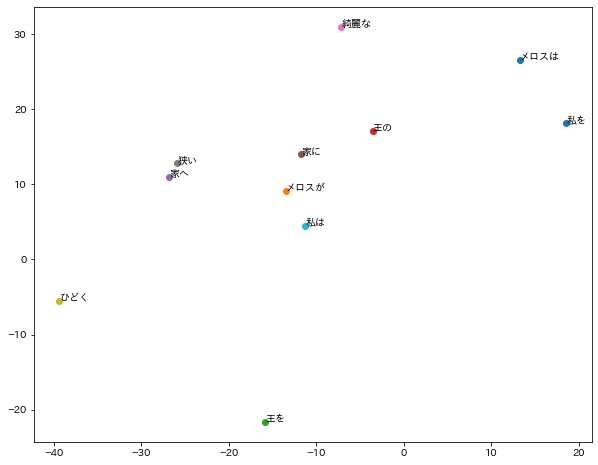

In [ ]:
a = ["メロスは","メロスが", "王を", "王の", "家へ", "家に", "綺麗な", "狭い", "ひどく", "私は", "私を"]

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1)

for b in a:
  ax.scatter(df["x"][b], df["y"][b])

for b in a:
    ax.annotate(b, (df["x"][b], df["y"][b]))

plt.show()

# 新しいセクション